In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("train.csv")

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [10]:
print(df.describe(include='all'))

        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.500000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare 

In [12]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


for col in df.select_dtypes(include='object').columns:
    print(f"\nValue counts for {col}:\n", df[col].value_counts())

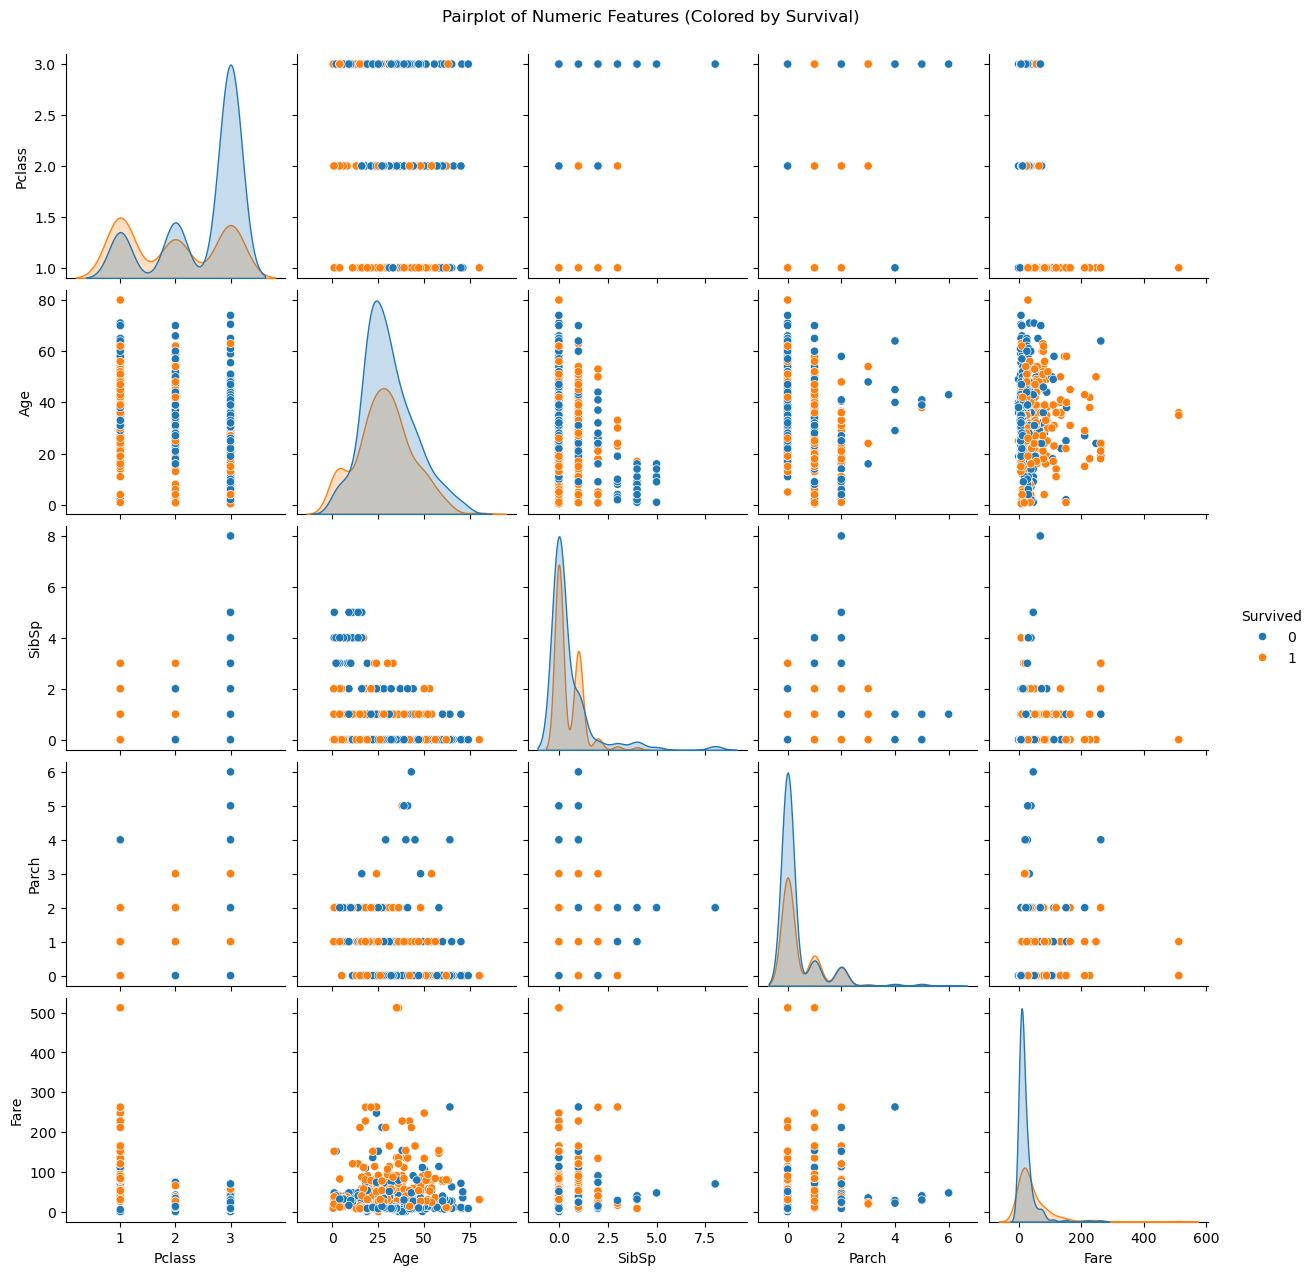

In [16]:
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']], hue='Survived')
plt.suptitle("Pairplot of Numeric Features (Colored by Survival)", y=1.02)
plt.show()

# Observation: Higher fares and younger ages show slightly higher survival rates.
#              Pclass strongly separates survival chances.

In [18]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [20]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

Text(0.5, 1.0, 'Correlation Heatmap')

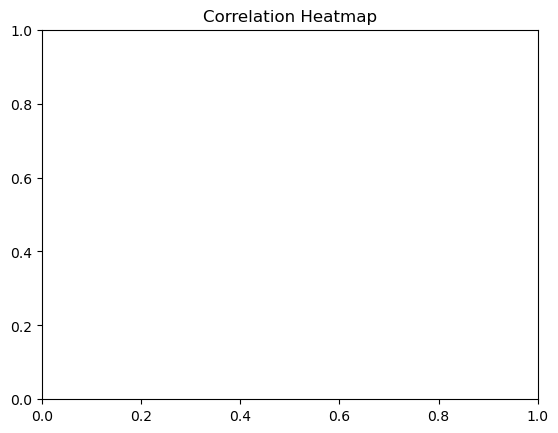

In [22]:
plt.title("Correlation Heatmap")

In [26]:
plt.show()

In [ ]:
# Observation: Fare and Pclass are negatively correlated (-0.55).
#              Survival is positively correlated with Fare (0.26) and negatively with Pclass (-0.34).

In [ ]:
# 4. Histograms

In [28]:
for col in df.select_dtypes(include=np.number).columns:

SyntaxError: incomplete input (11821069.py, line 1)

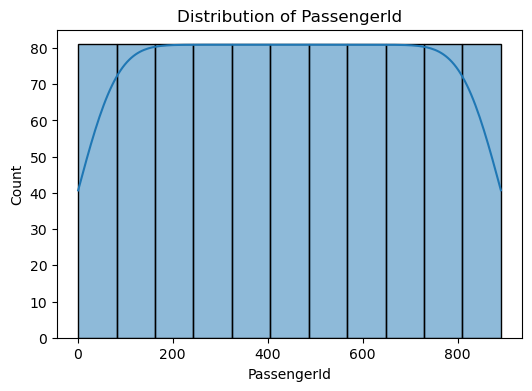

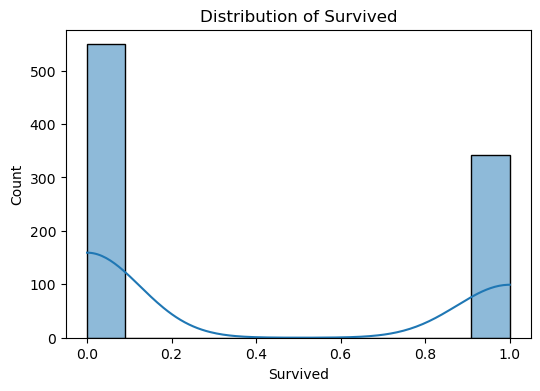

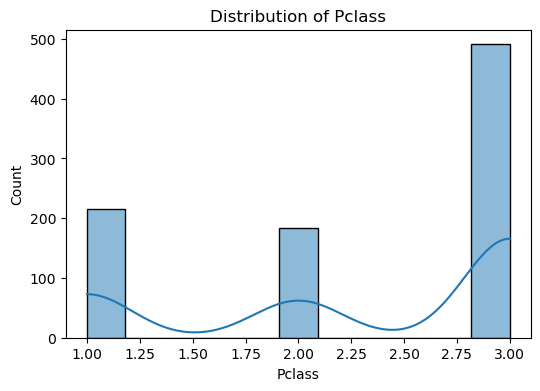

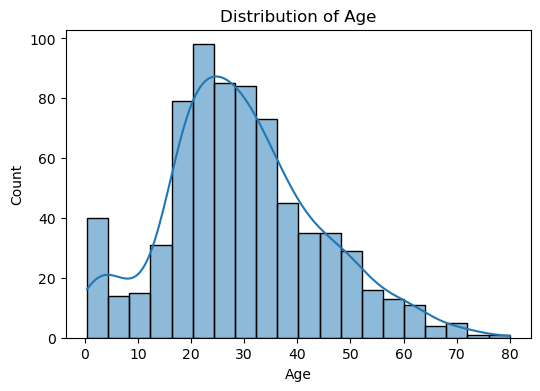

Observation: Age distribution is right-skewed with most passengers in 20–40 age range.


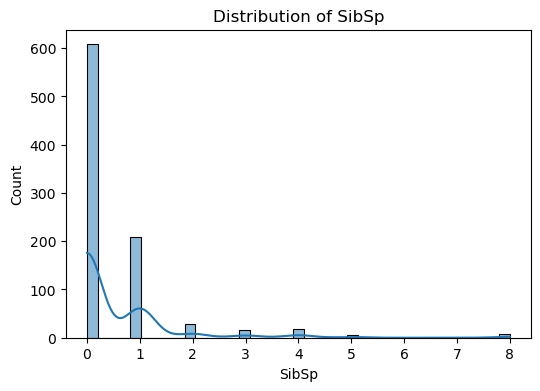

Observation: Most passengers traveled without siblings/spouses.


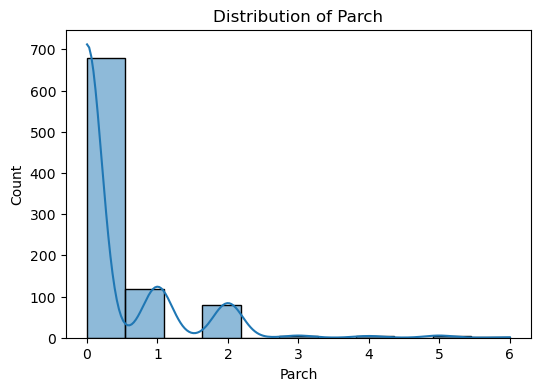

Observation: Most passengers traveled without parents/children.


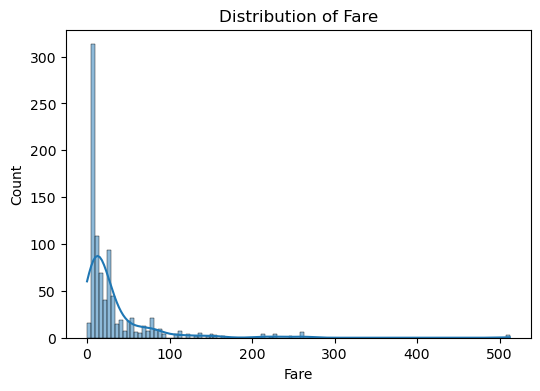

Observation: Fare is heavily right-skewed; a few passengers paid very high fares.


In [30]:
for col in df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()
    # Add observation for each:
    if col == 'Age':
        print("Observation: Age distribution is right-skewed with most passengers in 20–40 age range.")
    elif col == 'Fare':
        print("Observation: Fare is heavily right-skewed; a few passengers paid very high fares.")
    elif col == 'SibSp':
        print("Observation: Most passengers traveled without siblings/spouses.")
    elif col == 'Parch':
        print("Observation: Most passengers traveled without parents/children.")

In [ ]:
# 5. Boxplots

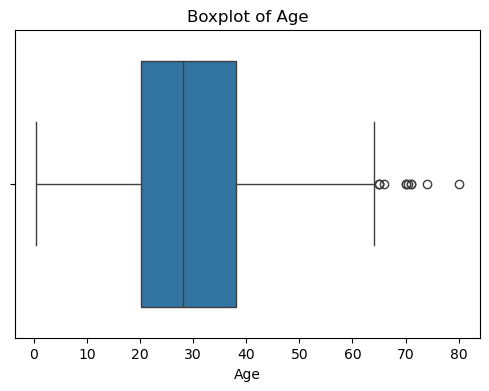

Observation: Few outliers in age (very young and very old).


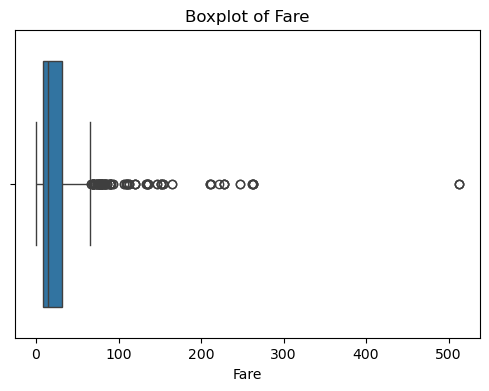

Observation: Significant outliers in Fare — some tickets were extremely expensive.


In [32]:
for col in ['Age', 'Fare']:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()
    # Observations:
    if col == 'Age':
        print("Observation: Few outliers in age (very young and very old).")
    elif col == 'Fare':
        print("Observation: Significant outliers in Fare — some tickets were extremely expensive.")

In [ ]:
# 6. Scatterplots 

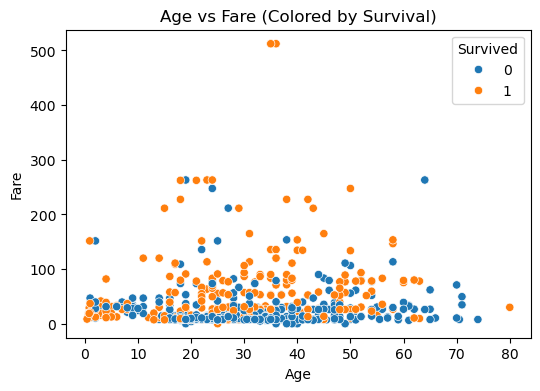

In [34]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title("Age vs Fare (Colored by Survival)")
plt.show()

In [ ]:
# Observation: Higher fares generally linked to higher survival; survival more common among younger passengers.

In [36]:
# 7. Summary of Findings

In [38]:
print("""
Summary:
1. Dataset has 891 rows, 12 columns, with missing data in Age (177), Cabin (687), Embarked (2).
2. Most passengers were male (577/891).
3. Survival rate is higher among females, higher-class passengers, and those paying higher fares.
4. Age distribution is concentrated between 20–40 years.
5. Fare distribution is right-skewed with extreme outliers.
6. Pclass is strongly related to Fare and survival chance.
7. Missing cabin data suggests many passengers traveled in shared or lower-class accommodations.
""")


Summary:
1. Dataset has 891 rows, 12 columns, with missing data in Age (177), Cabin (687), Embarked (2).
2. Most passengers were male (577/891).
3. Survival rate is higher among females, higher-class passengers, and those paying higher fares.
4. Age distribution is concentrated between 20–40 years.
5. Fare distribution is right-skewed with extreme outliers.
6. Pclass is strongly related to Fare and survival chance.
7. Missing cabin data suggests many passengers traveled in shared or lower-class accommodations.

